1. Importing the Libraries

In [1]:
import pandas as pd

In [17]:
import pandas as pd

# Specify the file path
file_path = r'C:\Users\Administrator\Desktop\Heart Disease Prediction System\dataset\heart.csv'

# Read the dataset
data = pd.read_csv(file_path)

# Now `data` contains your dataset from the specified path


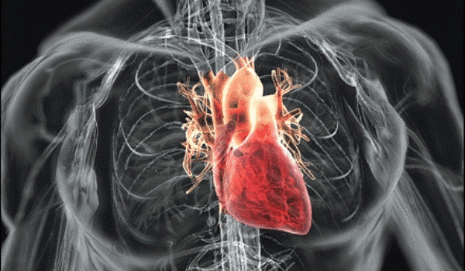

In [13]:
from IPython.display import Image

Image(filename='C:\\Users\\Administrator\\Desktop\\New folder\\heartbeating2.gif')


### 3. Taking Care of Missing Values

In [18]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 4. Taking Care of Duplicate Values

In [19]:
data_dup = data.duplicated().any()

In [20]:
data_dup

True

In [21]:
data = data.drop_duplicates()

In [22]:
data_dup = data.duplicated().any()

In [23]:
data_dup

False

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

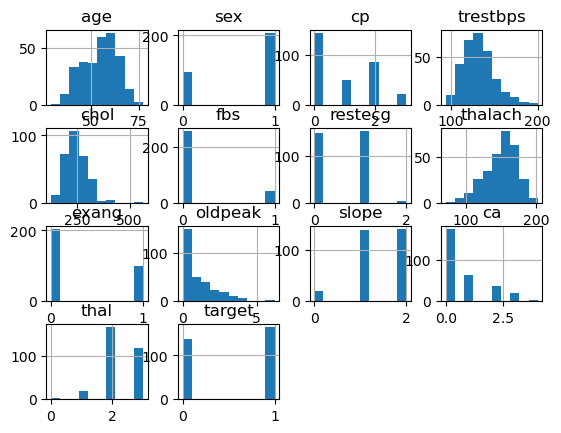

In [24]:
data.hist()

### 5. Data Processing

In [25]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [26]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [27]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### 6. Encoding Categorical Data

In [28]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [29]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [30]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [31]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


### 7. Feature Scaling

In [32]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [35]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


### 8. Splitting The Dataset Into The Training Set And Test Set

In [36]:
X = data.drop('target',axis=1)

In [37]:
y = data['target']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)

In [40]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

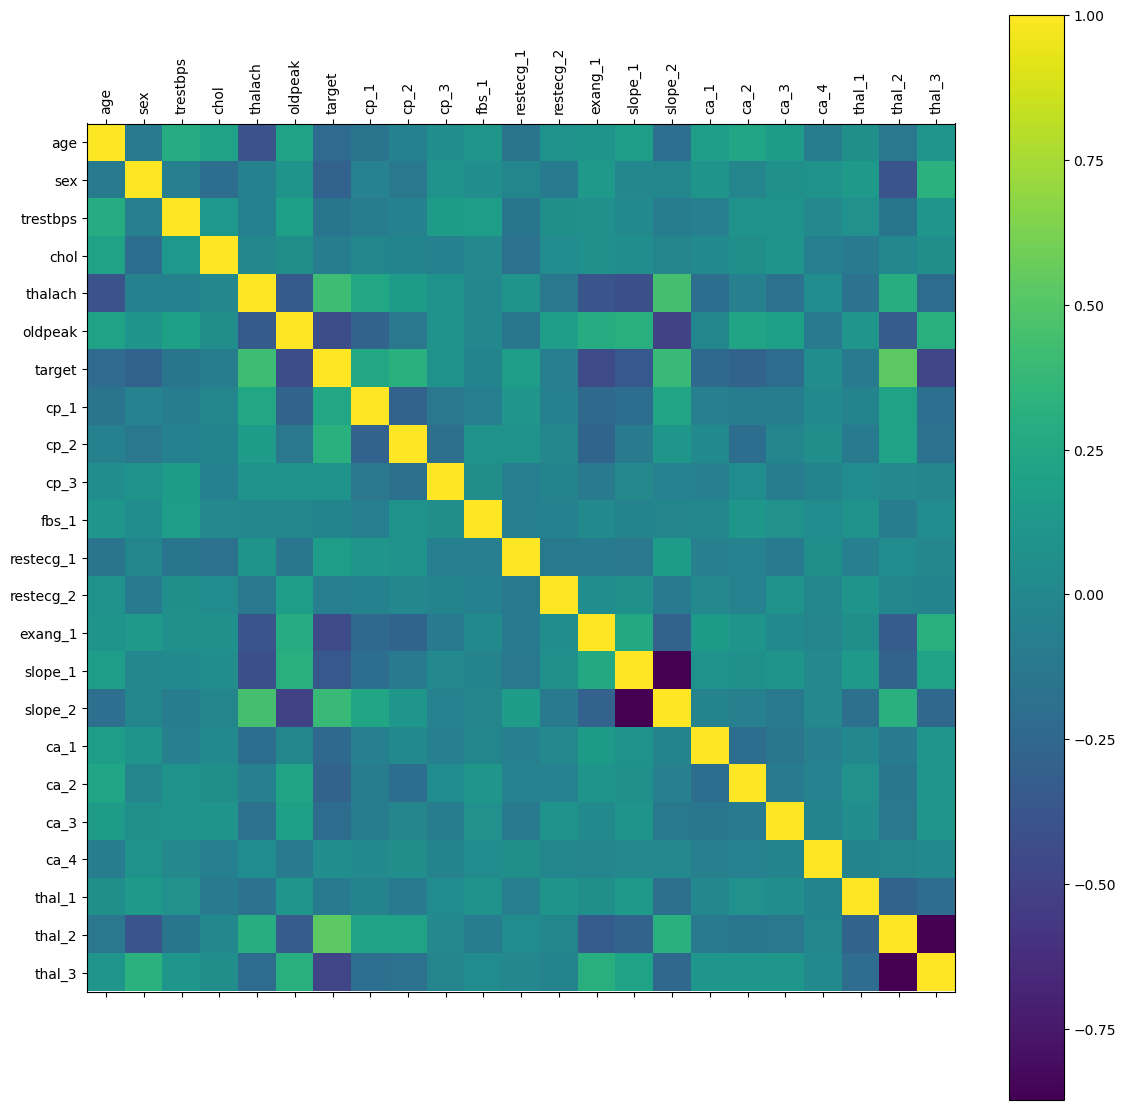

In [41]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (20, 14)
plt.matshow(data.corr())
plt.yticks(np.arange(data.shape[1]), data.columns)
plt.xticks(np.arange(data.shape[1]), data.columns, rotation=90)
plt.colorbar()
plt.show()


Text(0.5, 1.0, 'Count of each Target Class')

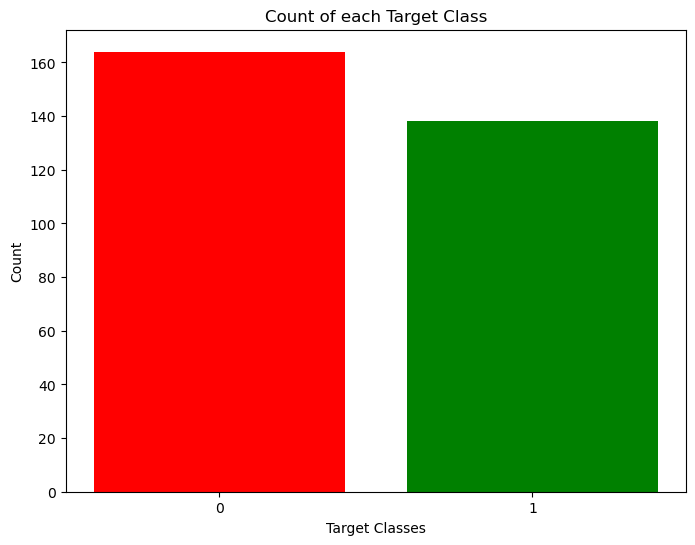

In [42]:
plt.rcParams['figure.figsize'] = 8,6
plt.bar(data['target'].unique(), data['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

### 9. Logistic Regression

In [43]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [46]:
y_pred1 = log.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

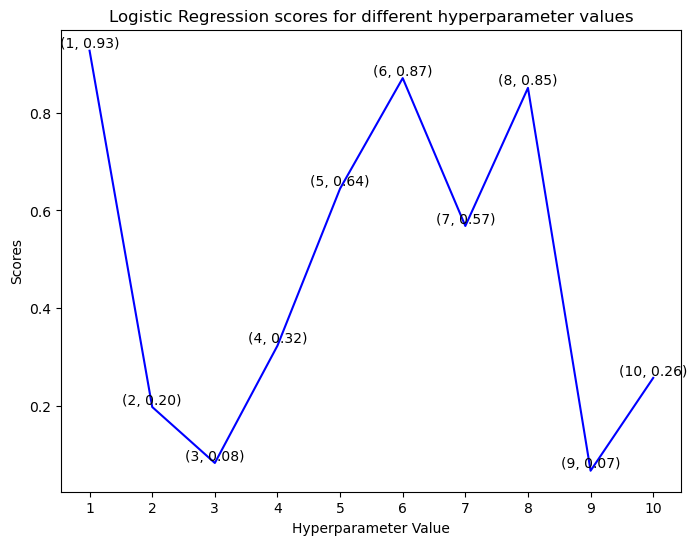

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
# Replace these with your actual data
X = np.random.rand(100, 10)  # Feature matrix
logreg_scores = np.random.rand(len(X[0]))  # Logistic Regression scores for different hyperparameters

# Plotting the line plot
plt.plot([i for i in range(1, len(X[0]) + 1)], logreg_scores, color='blue')

# Adding text labels
for i in range(1, len(X[0]) + 1):
    plt.text(i, logreg_scores[i-1], f'({i}, {logreg_scores[i-1]:.2f})', ha='center', va='bottom')

# Setting the ticks, labels, and title
plt.xticks([i for i in range(1, len(X[0]) + 1)])
plt.xlabel('Hyperparameter Value')  # Change this to reflect your actual hyperparameter
plt.ylabel('Scores')
plt.title('Logistic Regression scores for different hyperparameter values')

# Displaying the plot
plt.show()


### 10. SVC

In [50]:
from sklearn import svm

In [51]:
svm = svm.SVC()

In [52]:
svm.fit(X_train,y_train)

SVC()

In [53]:
y_pred2 = svm.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

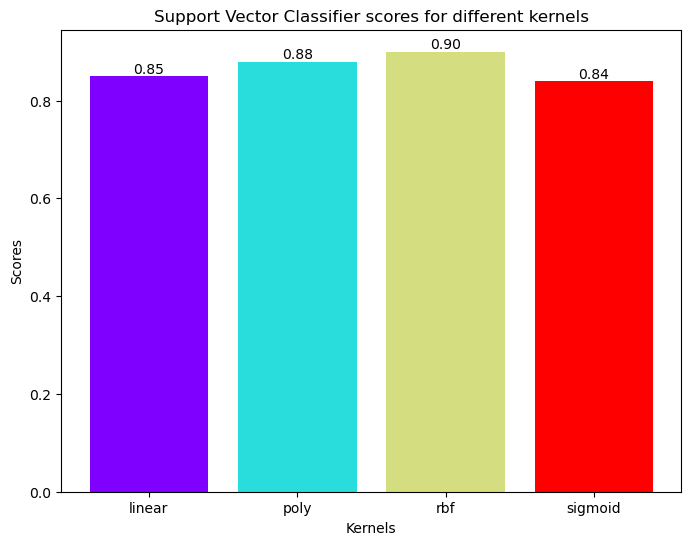

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svc_scores = [0.85, 0.88, 0.90, 0.84]

# Generating colors using the rainbow colormap
colors = plt.cm.rainbow(np.linspace(0, 1, len(kernels)))

# Plotting the bar chart
plt.bar(kernels, svc_scores, color=colors)

# Adding text labels
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], f'{svc_scores[i]:.2f}', ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

# Displaying the plot
plt.show()


### 11. KNeighbors Classifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn = KNeighborsClassifier()

In [58]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [59]:
y_pred3=knn.predict(X_test)

In [60]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [61]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [62]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [63]:
import matplotlib.pyplot as plt

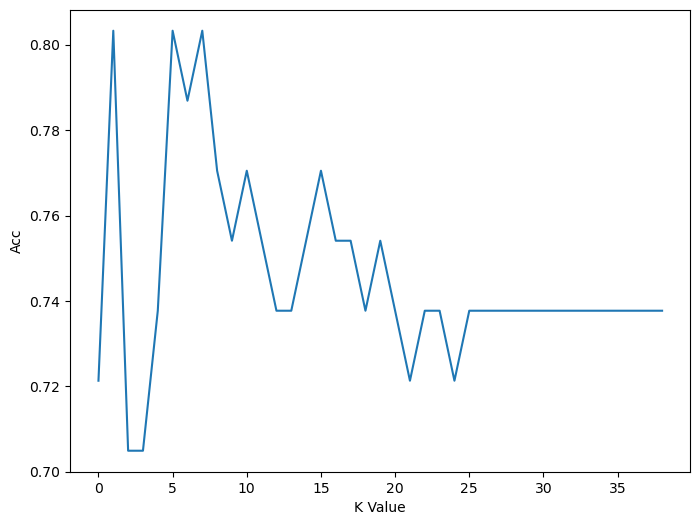

In [64]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [65]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8032786885245902

### Non-Linear ML Algorithms

In [67]:
import pandas as pd

# Specify the file path
file_path = r'C:\Users\Administrator\Desktop\Heart Disease Prediction System\dataset\heart.csv'

# Read the dataset
data = pd.read_csv(file_path)

# Now `data` contains your dataset from the specified path


In [68]:
data = data.drop_duplicates()

In [69]:
X = data.drop('target',axis=1)
y=data['target']

In [70]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)

### 12. Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dt = DecisionTreeClassifier()

In [73]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [74]:
y_pred4= dt.predict(X_test)

In [75]:
accuracy_score(y_test,y_pred4)

0.7540983606557377

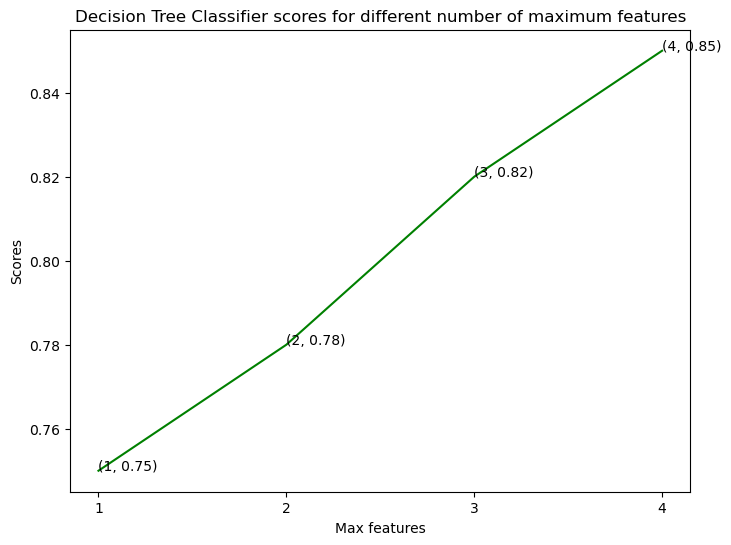

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example definition of X and dt_scores
# Assuming X is a DataFrame with some columns
X = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'feature3': np.random.rand(100),
    'feature4': np.random.rand(100)
})

# Example dt_scores
dt_scores = [0.75, 0.78, 0.82, 0.85]

# Plotting code
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color='green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')
plt.show()


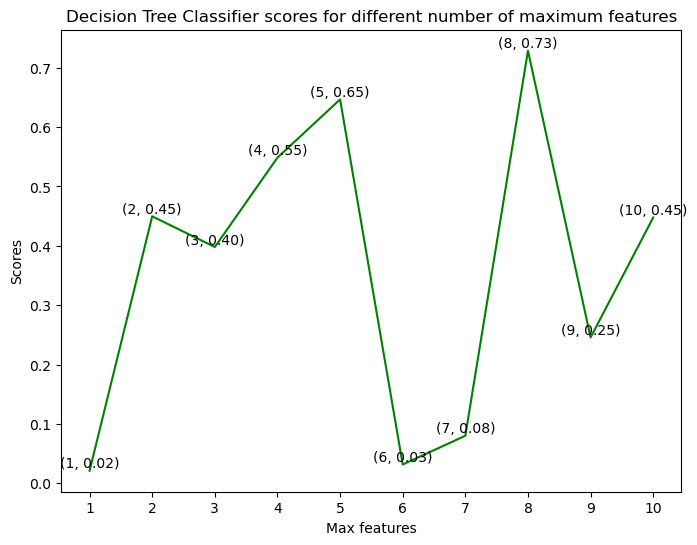

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
X = np.random.rand(100, 10)  # Replace this with your actual feature matrix
dt_scores = np.random.rand(len(X[0]))  # Replace this with your actual scores

# Plotting the line plot
plt.plot([i for i in range(1, len(X[0]) + 1)], dt_scores, color='green')

# Adding text labels
for i in range(1, len(X[0]) + 1):
    plt.text(i, dt_scores[i-1], f'({i}, {dt_scores[i-1]:.2f})', ha='center', va='bottom')

# Setting the ticks, labels, and title
plt.xticks([i for i in range(1, len(X[0]) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

# Displaying the plot
plt.show()


### 13. Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rf = RandomForestClassifier()

In [80]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [81]:
y_pred5= rf.predict(X_test)

In [82]:
accuracy_score(y_test,y_pred5)

0.8360655737704918

### 14. Gradient Boosting Classifier

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
gbc = GradientBoostingClassifier()

In [85]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [86]:
y_pred6 = gbc.predict(X_test)

In [87]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

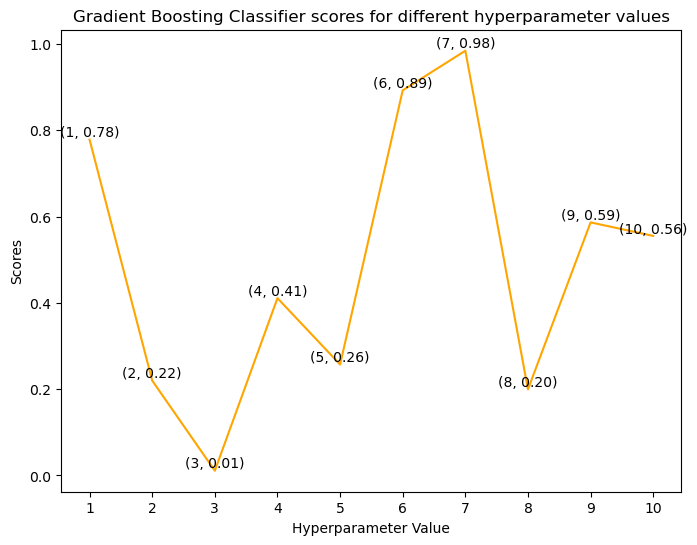

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
# Replace these with your actual data
X = np.random.rand(100, 10)  # Feature matrix
gbc_scores = np.random.rand(len(X[0]))  # Gradient Boosting Classifier scores for different hyperparameters

# Plotting the line plot
plt.plot([i for i in range(1, len(X[0]) + 1)], gbc_scores, color='orange')

# Adding text labels
for i in range(1, len(X[0]) + 1):
    plt.text(i, gbc_scores[i-1], f'({i}, {gbc_scores[i-1]:.2f})', ha='center', va='bottom')

# Setting the ticks, labels, and title
plt.xticks([i for i in range(1, len(X[0]) + 1)])
plt.xlabel('Hyperparameter Value')  # Change this to reflect your actual hyperparameter
plt.ylabel('Scores')
plt.title('Gradient Boosting Classifier scores for different hyperparameter values')

# Displaying the plot
plt.show()


In [89]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100,
                                accuracy_score(y_test,y_pred6)*100]})

In [90]:
final_data

,Models,ACC
0,LR,78.688525
1,SVM,80.327869
2,KNN,73.770492
3,DT,75.409836
4,RF,83.606557
5,GB,80.327869


In [91]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

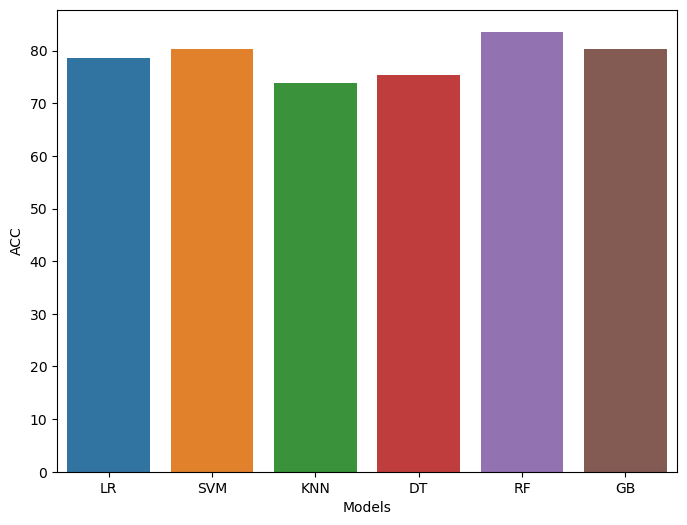

In [92]:
sns.barplot(x='Models', y='ACC', data=final_data)


In [93]:
X=data.drop('target',axis=1)
y=data['target']

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

### 15. Prediction on New Data

In [98]:
import pandas as pd

In [99]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3,    
},index=[0])

In [100]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [101]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


### 16. Save Model Using Joblib

In [102]:
import joblib

In [103]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [104]:
model = joblib.load('model_joblib_heart')

In [105]:
model.predict(new_data)

array([0], dtype=int64)

In [106]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [110]:
# Assuming X_train has column names, keep X_test consistent
X_test = X_test[X_train.columns]


In [111]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)


In [112]:
# Assuming X_train and X_test are already defined
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd

# Load example data (replace this with your actual dataset loading)
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Ensure X_test has the same columns as X_train
X_test = X_test[X_train.columns]

# Predict and evaluate
y_pred = rf.predict(X_test)
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


### GUI

In [107]:
from tkinter import *
import joblib

In [113]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Simad University"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)
label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)

Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

Conclusion

In this project, I attempted to diagnose with Machine Learning, if the given person is having a heart disease or not. Upon further, importing of the data, I used plot to analyze the data. After that, to deal with categorical features, I created dummy variables and for numerical features, I applied scaling. I applied six Machine Learning algorithms: Logistic Regression 0.78, K Neighbors Classifier 0.73, Support Vector Classifier 0.80, Gradient boosting Classifier 0.80, Decision Tree 0.72, Random Forest Classifier 0.83. I modified settings of each of the models to enhance their performances. Therefore, from the above said study the implementation of Random Forest Classifier yielded the highest percentage of 83%, which revealed the best performance.

When the user run GUI and has entered his medical data the GUI of the application will show the prediction on the Random Forest Classifier classification models. The output contains the predicted class (No heart disease class is 0 while the class with heart disease is 1) and the possibility of that class.